# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 10 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [ ]:
### BEGIN YOUR CODE

Student_ID = 9

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [ ]:
datasets = [('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Concrete Compressive Strength' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [13]:
### BEGIN YOUR CODE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing # для StandardScaler
# import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [14]:
### BEGIN YOUR CODE

# !wget https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# объединяю по столбцам
dataset = pd.concat([X, y], axis=1)

# # metadata
# print(concrete_compressive_strength.metadata)

# # variable information
# print(concrete_compressive_strength.variables)
# print(X,y)
# !unzip ...
# !tar ...
# !gunzip ...

# dataset = pd.read_csv

### END YOUR CODE

####  3. Посмотреть на общую картину (1 балл)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [ ]:
### BEGIN YOUR CODE

# Вывод базовой информации
# print("Признаки:")
# print(X.info())
# print("\nЦелевая переменная:")
# print(y.info())

# # Вывод описательной статистики
# print("Статистика по данным:")
# print(X.describe())

print("Основная информация о датасете:")
print(dataset.info())

print("\nСтатистические данные о признаках:")
print(dataset.describe())

### END YOUR CODE

Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None

Статистические данные о признаках:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  10

**Размер датасета**: 0.0725 Мб.

**Количество записей**: 1030 объектов.

**Количество признаков**: 8 числовых признаков и целевая переменная.

**Категориальные данные**: нет.

**Пропущенные значения**: нет.

**Целевой признак**: столбец Concrete compressive strength является целевым, тип данных - float64

**Решаемая задача**: регрессионная модель предсказывает прочность бетона на основе его состава и возраста. Это важно для оптимизации материалов и процессов в строительстве.

<!-- Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками. Некоторые из них могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

In [ ]:
### BEGIN YOUR CODE

# рекомендуется разбить выборку на обучающую и тестовую, например, с помощью StratifiedShuffleSplit из sklearn.model_selection

# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

### END YOUR CODE


Корреляция:

 Concrete compressive strength    1.000000
Cement                           0.497832
Superplasticizer                 0.366079
Age                              0.328873
Blast Furnace Slag               0.134829
Fly Ash                         -0.105755
Coarse Aggregate                -0.164935
Fine Aggregate                  -0.167241
Water                           -0.289633
Name: Concrete compressive strength, dtype: float64


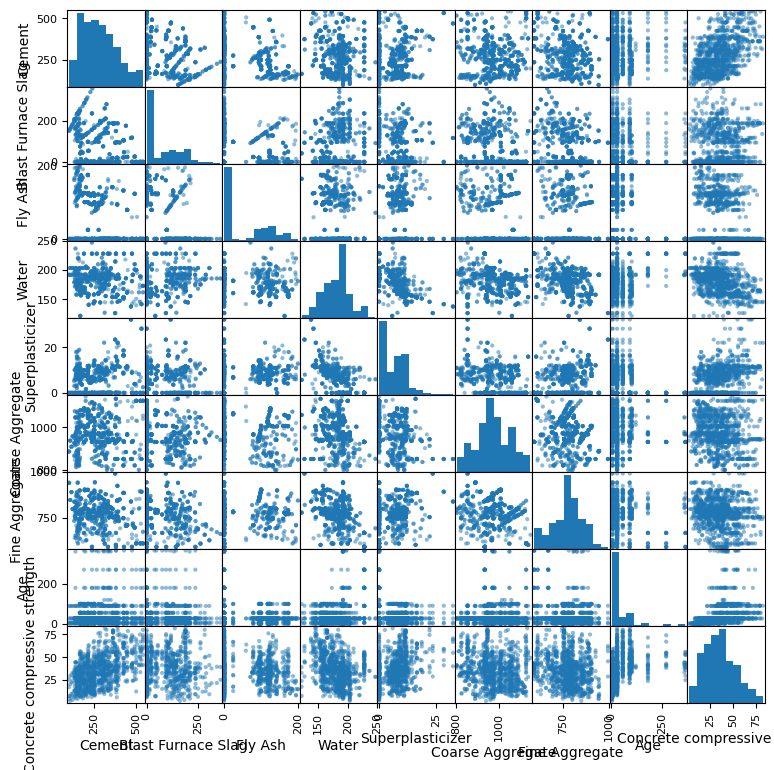

In [ ]:
# Анализ данных
corr_matrix = dataset.corr()
print("\nКорреляция с целевым признаком:\n\n", corr_matrix["Concrete compressive strength"].sort_values(ascending=False))

# Многомерная диаграмма рассеивания
pd.plotting.scatter_matrix(dataset, figsize=(9, 9))
plt.show()

In [3]:
# # Масштабирование признаков
# scaler = preprocessing.StandardScaler().fit(dataset)
# # print("\nданные датасета")
# # print(dataset)
# # print("\nсреднее признака")
# # print(scaler.mean_)
# # print("\nско признака")
# # print(scaler.scale_)

# dataset_scaled = scaler.transform(dataset)
# # print("\nполученный датасет")
# # print(dataset_scaled)

# #проверка
# # print(dataset_scaled.mean(axis=0))
# # print(dataset_scaled.std(axis=0))

In [15]:
# Масштабирование признаков
#  разбиваю выборку (8 к 2 обучение/тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# проверяю размер выборок
print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

def normalize(X):
    # Вычисление среднего и стандартного отклонения для каждого признака
    mean_all = X.mean(axis=0)  # Среднее по столбцам
    std_all = X.std(axis=0)    # Стандартное отклонение по столбцам
    # Нормализация всего датасета
    X_normalized = (X - mean_all) / std_all
    return X_normalized, mean_all, std_all

# Нормализация обучающих данных
X_train_normalized, mean_all, std_all = normalize(X_train)

# и тестовых
X_test_normalized = (X_test - mean_all) / std_all

# Проверка нормализованных данных
print("\nНормализованные обучающие данные:")
print(X_train_normalized.head())  # Показать первые 5 строк нормализованных данных

# # Создание и обучение StandardScaler на обучающих данных
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Применение обученного StandardScaler к тестовым данным
# X_test_scaled = scaler.transform(X_test)

# print(X_train_scaled)


Размер обучающей выборки: (824, 8)
Размер тестовой выборки: (206, 8)

Нормализованные обучающие данные:
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
995 -1.160173            0.856867  0.981853 -0.314094          1.480754   
507  1.307829           -0.602126  1.231850 -0.178084          0.391477   
334 -0.076819           -0.855064  1.066227 -1.045736          0.626091   
848 -0.291630            0.260163  0.356859  0.572318          0.307686   
294 -1.064391           -0.369883  1.111539 -1.102016          0.776914   

     Coarse Aggregate  Fine Aggregate       Age  
995         -0.257305       -0.647127 -0.275506  
507         -1.925780       -0.272982 -0.275506  
334          1.017242        0.066588 -0.688895  
848         -1.760584        0.603726 -0.275506  
294          1.362882        0.297496 -0.688895  


- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **LinearRegressionModel** class and its predefined methods.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [5]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.0  # скорость обучения
        self.cost  = 0    # значение функционала качества обученной модели (значение функции стоимости)

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций

        Выходные данные:
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """
        # поместите сюда ваш код

        return self.theta, self.cost

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        # поместите сюда ваш код для инициализации алгоритма подбора параметров методом градиентного спуска

        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters)
        return self.cost

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        #  поместите сюда ваш код для задания 5
        return self.cost

    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        # поместите сюда ваш код
        y_predict = None
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"



my_model = LinearRegressionModel()
# поместите сюда ваш код для вызова экземпляра класса LinearRegressionModel

print(my_model)

Вектор параметров: None


In [18]:
#HTLFE!!!!!

# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__ (self):
        """
        Инициализация модели
        """
        self.theta = None # вектор параметров модели
        self.alpha = 0.01  # скорость обучения
        self.cost_dynamics  = [] # динамика значение функционала качества обученной модели (значение функции стоимости)

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        #  поместите сюда ваш код для задания 5

        # Количество наблюдений и признаков
        n_samples, n_features = X_train.shape

        # Добавление столбца единиц для учета свободного члена
        X_aug = np.c_[np.ones((n_samples, 1)), X_train]

        # Приведение вектора целевой переменной к столбцовому виду
        y_train = y_train.reshape(-1, 1)

        # Матрицы для системы нормальных уравнений
        normal_matrix = np.dot(X_aug.T, X_aug)
        target_vector = np.dot(X_aug.T, y_train)

        # Размерность системы уравнений
        num_params = normal_matrix.shape[0]
        aug_matrix = np.hstack((normal_matrix, target_vector))

        # Прямой ход метода Гаусса
        for row_idx in range(num_params):
            pivot_element = aug_matrix[row_idx, row_idx]
            if np.isclose(pivot_element, 0):
                raise ValueError("Невозможно решить систему уравнений, так как главный элемент = 0.")

            aug_matrix[row_idx] /= pivot_element

            for next_row in range(row_idx + 1, num_params):
                factor = aug_matrix[next_row, row_idx]
                aug_matrix[next_row] -= factor * aug_matrix[row_idx]

        # Обратный ход метода Гаусса
        parameters = np.zeros((num_params, 1))
        for row_idx in range(num_params - 1, -1, -1):
            parameters[row_idx] = (
                aug_matrix[row_idx, -1]
                - np.dot(aug_matrix[row_idx, row_idx + 1:num_params], parameters[row_idx + 1:num_params])
            )

        self.theta = parameters

        # Вычисление стоимости (ошибки) модели
        predictions = np.dot(X_aug, self.theta)
        cost_dynamics = (1 / (2 * n_samples)) * np.sum((predictions - y_train)**2)


        return cost_dynamics


    def compute_cost(self, X, y, theta):
        """
        Вычисление функции стоимости (среднеквадратичная ошибка)
        """
        # Количество объектов
        m = len(y)
        # Предсказания модели
        predictions = X.dot(theta)
        # Ошибки предсказания
        errors = predictions - y

        cost_dynamics = (1 / (2 * m)) * np.sum(errors ** 2)  # Среднеквадратичная ошибка

        return cost_dynamics

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        Входные данные:
        alpha: скорость обучения
        iters: количество итераций

        Выходные данные:
        theta: обновлённое значение вектора параметров
        cost: итоговое значение функции стоимости
        """
        m = len(y_train)
        cost_history = []

        for i in range(iters):
            # Вычисляем предсказания и ошибки
            predictions = X_train.dot(theta)
            errors = predictions - y_train

            # Обновляем параметры (векторизованная формула)
            gradient = (1 / m) * X_train.T.dot(errors)
            theta -= alpha * gradient

            # Сохраняем значение функции стоимости
            cost = self.compute_cost(X_train, y_train, theta)
            cost_history.append(cost)

        self.cost_history = cost_history
        return theta


    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        # поместите сюда ваш код для инициализации алгоритма подбора параметров методом градиентного спуска

        # Добавление столбца свободного члена
        X_aug = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        self.theta = np.zeros(X_aug.shape[1])  # Инициализация параметров

        # Вызываем градиентный спуск
        self.theta = self.gradient_descent(X_aug, y_train, self.theta, self.alpha, iters)

        # Сохраняем финальную стоимость
        self.cost = self.cost_history[-1] if self.cost_history else 0
        return self.cost


    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        # поместите сюда ваш код
        y_predict = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}"



my_model = LinearRegressionModel()
# поместите сюда ваш код для вызова экземпляра класса LinearRegressionModel
cost = my_model.fit_with_GD(X_train_normalized, y_train, iters=500)
print("Функция стоимости после обучения:", cost)
print("Найденные параметры (theta):", my_model)

ValueError: Unable to coerce to Series, length must be 1: given 824

* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

Text(0.5, 1.0, 'Error vs. Training Iterations')

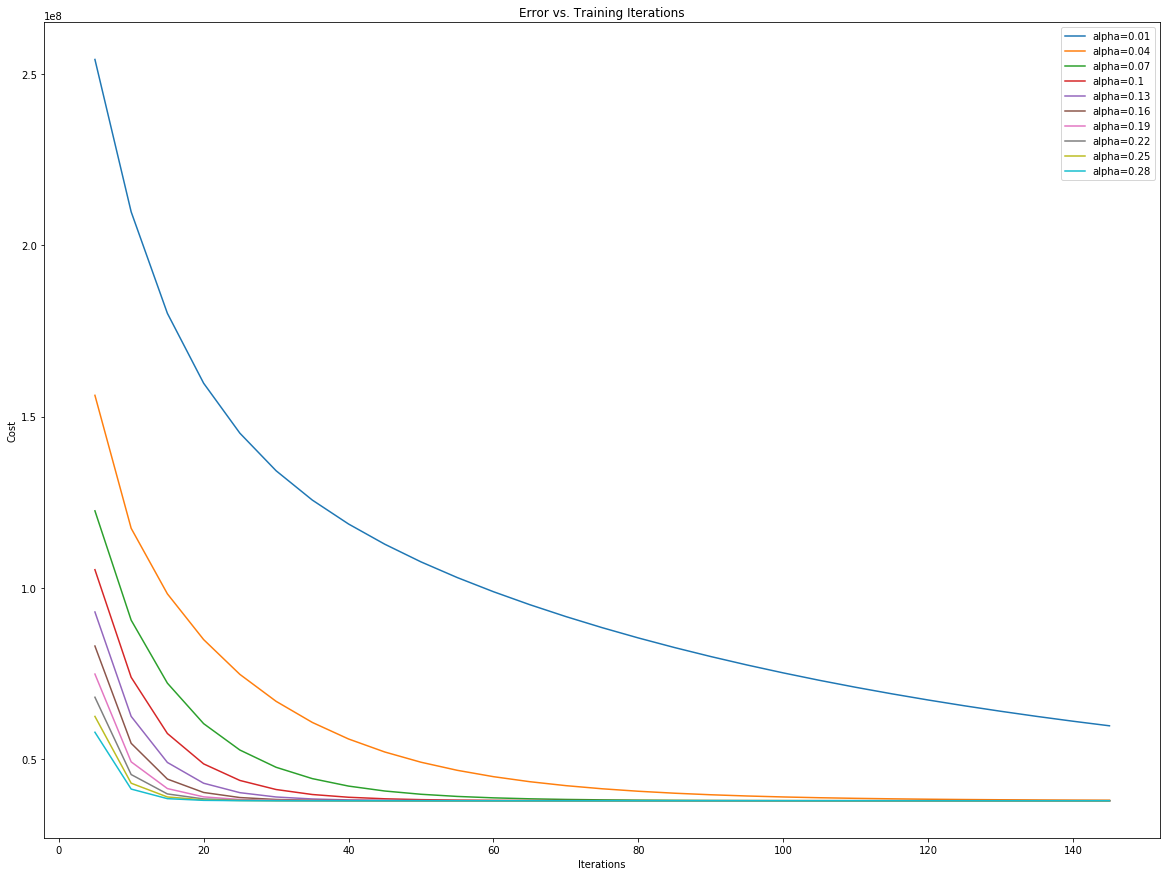

In [ ]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(20, 15))
# поместите сюда ваш код
iters = []

for i in range(0, 90, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model.alpha = i / 100
    costs = []
    for j in iters:
        costs.append(my_model.fit_with_GD(X_train, y_train, j))
    plt.plot(iters, costs)


# не забудьте про легенду
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


In [ ]:
#HTLFE!!!!!

# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(20, 15))
# поместите сюда ваш код
iters = []

for i in range(0, 90, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model.alpha = i / 100
    costs = []
    for j in iters:
        costs.append(my_model.fit_with_GD(X_train, y_train, j))
    plt.plot(iters, costs)


# не забудьте про легенду
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 5. Решить систему нормальных уравнений (метод наименьших квадратов) (1 балл)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует номирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [ ]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

- - -
#### 6. Сравнить разные методы (2 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?


In [ ]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train, y_train)
y_predict = my_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# поместите сюда ваш код

*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 7. Опшите полученные результаты (1 балл)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

*Поместите сюда свой текст*

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.